<a href="https://colab.research.google.com/github/TurboGoose/Artificial_Intelligence/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Сверточная нейронная сеть по распознаванию изображений рукописных цифр**

Выполнил студент группы 19.Б05-пу Коновалов Илья

# Импортируем все необходимые библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Загружаем датасет

В качестве датасета выступает база данных MNIST.


Обучающая выборка включает в себя 60000 изображений масштабом 28х28 пикселей.

Тестовая выборка - 10000 изображений.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Пример входных данных

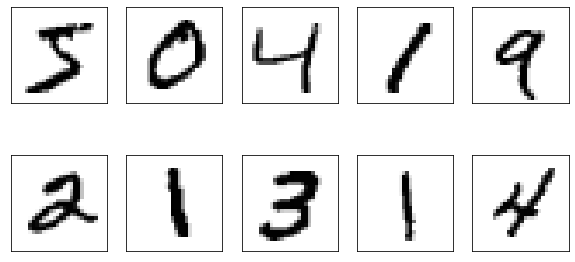

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

# Стандантизируем входные данные

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Преобразовываем результаты к категориальному виду

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Конфигурируем нейронную сеть

После ряда экспериментов была выбрана следующая модель сверточной нейронной сети:

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10,  activation='softmax')
])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                802880    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 822,346
Trainable params: 822,346
Non-trainable params: 0
________________________________________________

# Компилируем нейронную сеть

В качестве критерия качества выбрана категориальная кросс-энтропия,
поскольку распознавание рукописных цифр по сути является задачей классификации изображений по одной из 10 категорий.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем нейронную сеть

Поскольку датасет не слишком большой, ограничимся размером одного батча в 100 изображений.

В качестве валидационной выборки берутся 20% данных обучающей выборки (12000 изображений).

In [ ]:
history = model.fit(x_train, y_train_cat, batch_size=100, epochs=4, validation_split=0.2)

Epoch 1/4
480/480 [==============================] - 54s 113ms/step - loss: 0.1972 - accuracy: 0.9404 - val_loss: 0.0647 - val_accuracy: 0.9812
Epoch 2/4
480/480 [==============================] - 55s 114ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0529 - val_accuracy: 0.9842
Epoch 3/4
480/480 [==============================] - 55s 115ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0516 - val_accuracy: 0.9857
Epoch 4/4
480/480 [==============================] - 55s 115ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0419 - val_accuracy: 0.9872


# Графики функции потерь для процессов обучения и валидации

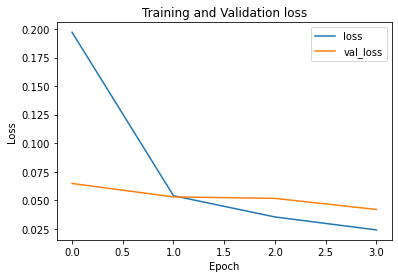

In [ ]:
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.show()

# Графики точности работы нейронной сети для процессов обучения и валидации

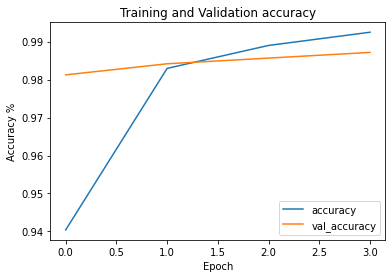

In [ ]:
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.show()

# Проверяем качество обучения на тестовой выборке

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 12ms/step - loss: 0.0347 - accuracy: 0.9882


[0.034696314483881, 0.9882000088691711]

# Итоги

Сверточная нейронная сеть показала достойный результат в задаче классификации изображений рукописных цифр, достигнув показателей точности близких к 100%.